## Final Project Submission

Please fill out:
* Student name: Judy Chepkurui Koech 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### READING DATA

In [3]:
import sqlite3
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
conn = sqlite3.connect(r'zippedData\im.db')



In [4]:
conn = sqlite3.connect(r'zippedData\im.db')

#USing pandas get the table names in the database
q ="""SELECT name 
      FROM sqlite_master 
      WHERE type = 'table'""";

pd.read_sql(q, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


The most relevant tables to use are the movie_basics and movie_ratings.Lets take a look at the tables and familiarise ourselves with their content

In [71]:
movie_directors = pd.read_sql("""SELECT * FROM directors;""", conn)
movie_directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [73]:
movie_writers  = pd.read_sql("""SELECT * FROM writers;""", conn)
movie_writers.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [29]:
movie_basics = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [30]:
movie_ratings= pd.read_sql("""SELECT * FROM movie_ratings;""", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### DESCRIPTIVE STATISTICS
Let look at the the descriptive staticts for both movie_basics and movie_ratings


In [31]:
pd.read_sql("""SELECT * FROM movie_basics;""", conn).describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [32]:
pd.read_sql("""SELECT * FROM movie_ratings;""", conn).describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [33]:
bom_movie = pd.read_csv(r'zippedData/Dataset1.csv')
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [13]:
bom_movie = pd.read_csv(r'zippedData/Dataset1.csv').describe()
bom_movie

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


 # Data Cleaning

In [16]:
bom_movie.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   domestic_gross  8 non-null      float64
 1   year            8 non-null      float64
dtypes: float64(2)
memory usage: 192.0+ bytes


In [34]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [35]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


# Checking for null values

In [37]:
movie_basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Drop values with null values in movie_basics and bom.movie_gross

In [41]:
movie_basics = movie_basics.dropna(subset= ['genres'])
movie_basics = movie_basics.dropna(subset= ['original_title'])

In [38]:
bom_movie.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [48]:
bom_movie.dropna(subset= ['studio'], inplace=True)

In [50]:

# Convert 'foreign_gross' column to string type
bom_movie['foreign_gross'] = bom_movie['foreign_gross'].astype(str)

# Remove commas from 'foreign_gross' column
bom_movie['foreign_gross'] = bom_movie['foreign_gross'].str.replace(',', '')

# Convert 'foreign_gross' column to numeric
bom_movie['foreign_gross'] = pd.to_numeric(bom_movie['foreign_gross'], errors='coerce')

# Fill missing values in 'foreign_gross' column with the median
bom_movie['foreign_gross'].fillna(bom_movie['foreign_gross'].median(), inplace=True)

In [40]:
movie_ratings.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

### Data Analysis

The first analysis is to see the distribution of movies by genre which will help  us to determine which genre is highly produced.

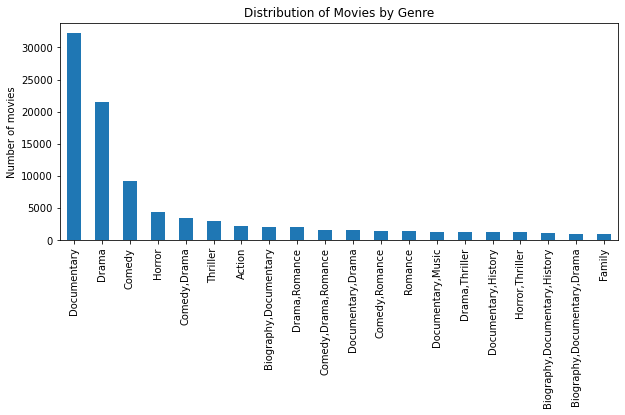

In [57]:
ax = movie_basics['genres'].value_counts()[:20].plot(figsize = (10,4), kind= 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# set the y-axis label
ax.set_ylabel("Number of movies")
# set the title
ax.set_title("Distribution of Movies by Genre");

According to the bar above Docummentary has the larest distribution followed by drama and famly movies havin the lowest distribution.
This shows that incase microsoft decides to venture into movies Documentary will garner more attention  


Determine the standard runtime for movies

In [54]:
movie_basics['runtime_minutes'].describe()

count    112232.000000
mean         86.261556
std         167.896646
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

Using mean it shows that most movies runtime is 86 minutes hence movies produced by microsoft should be within that range. 

In [58]:
bom_movie['domestic_gross'].describe()

count    3.382000e+03
mean     2.856106e+07
std      6.679161e+07
min      1.000000e+02
25%      1.230000e+05
50%      1.400000e+06
75%      2.767500e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [59]:
bom_movie['foreign_gross'].describe()

count    3.382000e+03
mean     5.251615e+07
std      1.101098e+08
min      6.000000e+02
25%      1.170000e+07
50%      1.870000e+07
75%      2.917500e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

array([[<AxesSubplot:title={'center':'domestic_gross'}>,
        <AxesSubplot:title={'center':'foreign_gross'}>]], dtype=object)

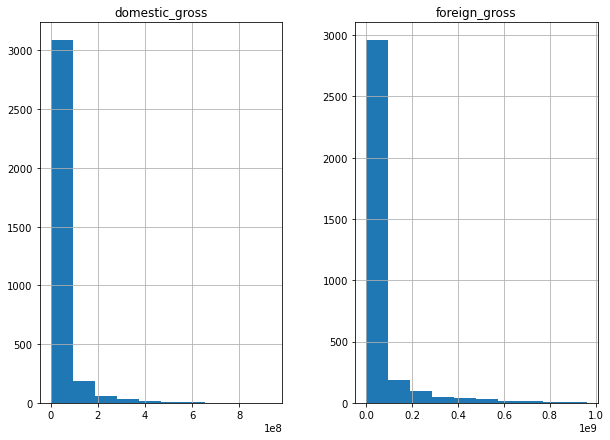

In [61]:
bom_movie.hist(figsize= (10,7), column= ['domestic_gross','foreign_gross'], bins=10)

The data above shows us that the domestic_gross column we see the descriptive statistics which are the mean, 25th percentile, maximum of the table values and so on.The standard deviation is high telling us the data has large spread from the mean.From the histogram we see it has a right skew distribution.This indicates that the most common domestic gross amount is less than the average

Also for the foreign_gross column the descriptive statistics can be seen,the standard deviation is low telling us that the spread is minimal.The column also has a right skewed distribution also indicating that the most common foreign gross amount is less than the average gross amount

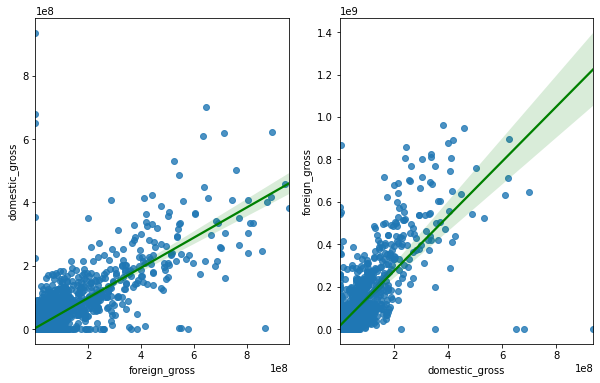

In [62]:
#Plot scatter plots with a regression module
domestic_g = bom_movie['domestic_gross']
foreign_g = bom_movie['foreign_gross']

fig, ax =plt.subplots(1,2, figsize= (10,6))
sns.regplot(x= foreign_g, y= domestic_g, line_kws={'color': 'g'}, ax= ax[0])
sns.regplot(x= domestic_g, y= foreign_g, line_kws={'color': 'g'}, ax= ax[1]);

In [63]:
correlation = domestic_g.corr(foreign_g, method= 'pearson')
'Pearson coefficient of domestic_gross and foreign_gross is: ' + str(correlation)

'Pearson coefficient of domestic_gross and foreign_gross is: 0.7840594568087642'

 As it can be seen above from both the scatter plot, regression line and the pearson coefficient that the two tables have a strong positive correlation.It can also be seen that the slope in the second plot is steeper than the slope of the first plot.This indicates that movies that earn a higher domestic gross earn foreign gross at faster rate

Below we can take a look at the relation in the ratings table between its tables

In [64]:
ratings_and_basics = pd.merge(movie_ratings, movie_basics, how="left", on= 'movie_id')

In [69]:
rating_rank = ratings_and_basics.groupby('genres', as_index= False)['numvotes'].sum().sort_values('numvotes', ascending = False).tail(10)
rating_rank

,genres,numvotes
344,"Animation,Horror,Romance",6
668,"Documentary,Music,Reality-TV",6
611,"Crime,Western",5
66,"Action,Crime,Musical",5
862,"Horror,Musical,Romance",5
809,"Family,War",5
882,"Music,Mystery",5
77,"Action,Documentary,Horror",5
449,"Comedy,Documentary,Fantasy",5
851,"History,Sport",5


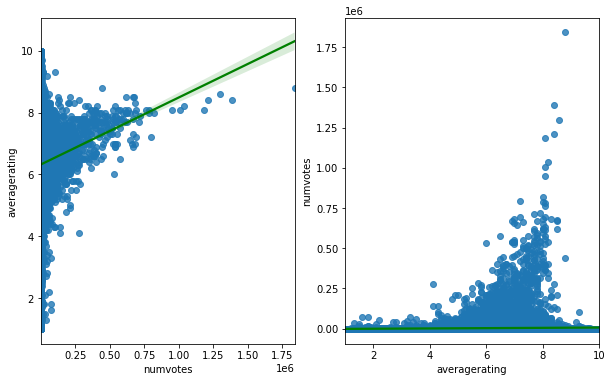

In [75]:
ratings = movie_ratings['averagerating']
votes = movie_ratings['numvotes']
fig, ax =plt.subplots(1,2, figsize= (10,6))
sns.regplot(x= votes, y= ratings, line_kws={'color': 'g'}, ax= ax[0])
sns.regplot(x= ratings, y= votes, line_kws={'color': 'g'}, ax= ax[1]);